In [1]:
import lsst.daf.butler as dafButler
import os
import lsst.geom
import lsst.afw.display as afwDisplay
import matplotlib.pyplot as plt
afwDisplay.setDefaultBackend("matplotlib")

In [2]:
# instantiate the butler
butler = dafButler.Butler(os.environ['REPO'])

In [3]:
# get a difference image from the Butler
detector = 4

refs = list(set(list(
    butler.registry.queryDatasets(
        "differenceExp", collections="DEEP/20190403/A0c", where=f"instrument='DECam' and detector={detector}"
    )
)))

ref = refs[0]
print(ref.dataId)

{instrument: 'DECam', detector: 4, visit: 845881, band: 'VR', physical_filter: 'VR DECam c0007 6300.0 2600.0'}


In [4]:
psf = butler.get(ref.makeComponentRef("psf")) # get the psf model
bbox = butler.get(ref.makeComponentRef("bbox")) # get a bounding box for the detector

In [5]:
type(psf)

lsst.meas.algorithms.KernelPsf

In [6]:
type(bbox)

lsst.geom.Box2I

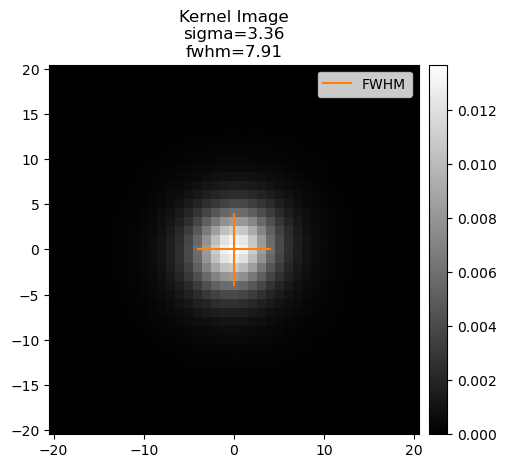

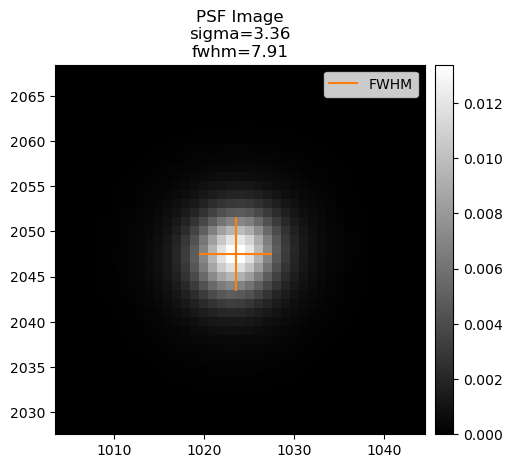

In [7]:
center = bbox.getCenter() # center of the detector in pixels

kernelImage = psf.computeKernelImage(center) # the PSF kernel image
image = psf.computeImage(center) # a realization of the PSF on the detector
shape = psf.computeShape(center) # the shape of the PSF
psfSigma = shape.getDeterminantRadius() # the standard deviation of the Gaussian PSF model
fwhm = 2.355 * psfSigma # the FWHM of the Gaussian PSF model

# plot the kernel image and FWHM
fig = plt.figure()
display = afwDisplay.Display(frame=fig)
display.mtv(kernelImage)
plt.plot([-fwhm/2, fwhm/2], [0, 0], color="C1", label="FWHM")
plt.plot([0, 0], [-fwhm/2, fwhm/2], color="C1")
plt.legend()
plt.title(f"Kernel Image\nsigma={psfSigma:0.2f}\nfwhm={fwhm:0.2f}")
plt.show()

# plot the image and FWHM
fig = plt.figure()
display = afwDisplay.Display(frame=fig)
display.mtv(image)
plt.plot(
    [-fwhm/2 + center.getX(), fwhm/2 + center.getX()], 
    [center.getY(), center.getY()], 
    color="C1", 
    label="FWHM"
)
plt.plot(
    [center.getX(), center.getX()], 
    [-fwhm/2 + center.getY(), fwhm/2 + center.getY()], 
    color="C1"
)
plt.legend()
plt.title(f"PSF Image\nsigma={psfSigma:0.2f}\nfwhm={fwhm:0.2f}")
plt.show()